https://zaynmak.github.io/posts/Penguins/Penguins.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

train_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/train.csv"
train = pd.read_csv(train_url)

# set seed for reproducibility
np.random.seed(0)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie Penguin (Pygoscelis adeliae),38.710256,18.365812,189.965812,3667.094017
Chinstrap penguin (Pygoscelis antarctica),48.719643,18.442857,195.464286,3717.857143
Gentoo penguin (Pygoscelis papua),47.757000,15.035000,217.650000,5119.500000


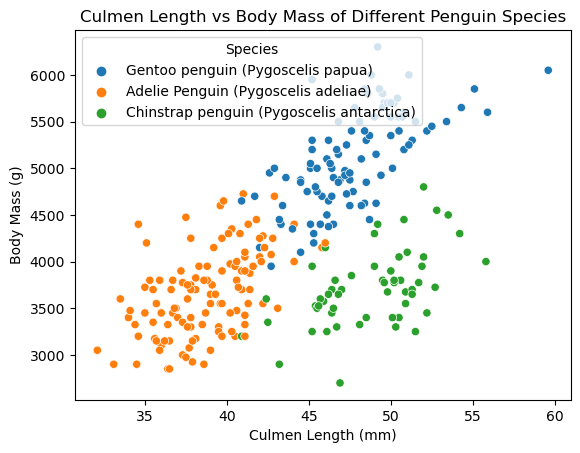

In [2]:
species_group = train[["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", "Species"]].groupby('Species').aggregate('mean')
# display figure
sns.scatterplot(data=train, x="Culmen Length (mm)", y="Body Mass (g)", hue="Species").set(title="Culmen Length vs Body Mass of Different Penguin Species")
# display table
species_group

First I only selected a few columns with quantitative data, then grouped the observations by species and saw the mean of the values. Looking at the table and figure we see that Gentoo penguins tend to have a higher body mass, flipper length, and smaller culmen depth compared to the other two species. Meanwhile Adelie penguins tend to have a smaller culmen length and flipper length compared to the other two species. Chinstrap penguins tend to have a similar body mass and culmen depth to Adelie penguins, and similar culmen length to Gentoo penguins.
The figure agrees with our observations of the table. We see that Gentoo penguins tend to have a higher body mass, while Adelie penguins tend to have a smaller culmen length. The figure also shows that Chinstrap penguins tend to have a similar body mass to Adelie penguins, and similar culmen length to Gentoo penguins.

In [3]:
le = LabelEncoder()
le.fit(train["Species"])

def prepare_data(df):
  df = df.drop(["studyName", "Sample Number", "Individual ID", "Date Egg", "Comments", "Region"], axis = 1)
  df = df[df["Sex"] != "."]
  df = df.dropna()
  y = le.transform(df["Species"])
  df = df.drop(["Species"], axis = 1)
  df = pd.get_dummies(df)
  return df, y

X_train, y_train = prepare_data(train)

In [4]:
# I picked the quantitative and qualitative predictors that I thought would be most useful for predicting the species of a penguin.
all_qual_cols = ["Clutch Completion", "Island"]
all_quant_cols = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)', "Body Mass (g)"]

best_cols = 0
best_score = 0

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    LR = LogisticRegression(max_iter=3000)
    LR.fit(X_train[cols], y_train)
    score = LR.score(X_train[cols], y_train)
    if score > best_score:
      best_score = score
      best_cols = cols

print(best_cols, best_score)

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'] 0.99609375


The predictors that result in the highest accuracy in a logistic regression are Island, Culmen Length, and Culmen Depth. Next we want to see our model's accuracy on the test set.

In [5]:
test_url = "https://raw.githubusercontent.com/middlebury-csci-0451/CSCI-0451/main/data/palmer-penguins/test.csv"
test = pd.read_csv(test_url)

X_test, y_test = prepare_data(test)

In [6]:
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train[best_cols], y_train)
LR.score(X_test[best_cols], y_test)

1.0

We found a 100% accuracy on the test set. This is a very high accuracy, and we can be confident that our model is a good predictor of penguin species. Out of Curiosity, I wanted to see if other predictors would be better on different models. I first ran a random forest classifier, decision tree classifier.

In [7]:
best_cols = 0
best_score = 0

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    RF = RandomForestClassifier(max_depth=5)
    RF.fit(X_train[cols], y_train)
    score = RF.score(X_train[cols], y_train)
    if score > best_score:
      best_score = score
      best_cols = cols

print(best_cols, best_score)
RF = RandomForestClassifier(max_depth=5)
RF.fit(X_train[best_cols], y_train)
RF.score(X_test[best_cols], y_test)

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'] 1.0


0.9852941176470589

For the random forest classifier, we find the same predictors are used, however the testing accuracy is not 100%.

In [8]:
best_cols = 0
best_score = 0

for qual in all_qual_cols: 
  qual_cols = [col for col in X_train.columns if qual in col ]
  for pair in combinations(all_quant_cols, 2):
    cols = list(pair) + qual_cols
    DR = DecisionTreeClassifier(max_depth=5)
    DR.fit(X_train[cols], y_train)
    score = DR.score(X_train[cols], y_train)
    if score > best_score:
      best_score = score
      best_cols = cols

print(best_cols, best_score)
DR = DecisionTreeClassifier(max_depth=5)
DR.fit(X_train[best_cols], y_train)
DR.score(X_test[best_cols], y_test)

['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island_Biscoe', 'Island_Dream', 'Island_Torgersen'] 1.0


0.9852941176470589

Similarly for the decision tree classifier, we find the same predictors are used, however the testing accuracy is not 100%.

In [20]:
def plot_regions(model, X, y):
    
    x0 = X[X.columns[0]]
    x1 = X[X.columns[1]]
    qual_features = X.columns[2:]
    
    fig, axarr = plt.subplots(1, len(qual_features), figsize = (7, 3))

    # create a grid
    grid_x = np.linspace(x0.min(),x0.max(),501)
    grid_y = np.linspace(x1.min(),x1.max(),501)
    xx, yy = np.meshgrid(grid_x, grid_y)
    
    XX = xx.ravel()
    YY = yy.ravel()

    for i in range(len(qual_features)):
      XY = pd.DataFrame({
          X.columns[0] : XX,
          X.columns[1] : YY
      })

      for j in qual_features:
        XY[j] = 0

      XY[qual_features[i]] = 1

      p = model.predict(XY)
      p = p.reshape(xx.shape)
      
      
      # use contour plot to visualize the predictions
      axarr[i].contourf(xx, yy, p, cmap = "jet", alpha = 0.2, vmin = 0, vmax = 2)
      
      ix = X[qual_features[i]] == 1
      # plot the data
      axarr[i].scatter(x0[ix], x1[ix], c = y[ix], cmap = "jet", vmin = 0, vmax = 2)
      
      axarr[i].set(xlabel = X.columns[0], 
            ylabel  = X.columns[1],
            title = qual_features[i])
      
      patches = []
      for color, spec in zip(["red", "green", "blue"], ["Adelie", "Chinstrap", "Gentoo"]):
        patches.append(Patch(color = color, label = spec))

      plt.legend(title = "Species", handles = patches, loc = "best")
      
      plt.tight_layout()

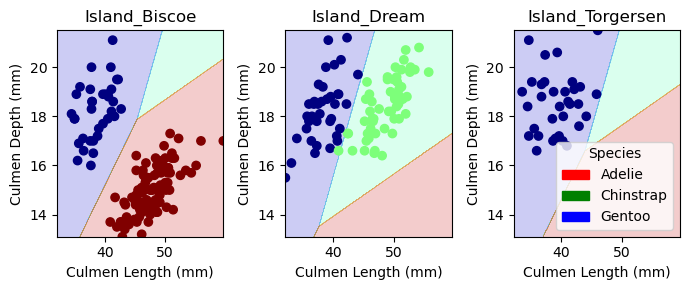

In [21]:
plot_regions(LR, X_train[best_cols], y_train)

On Biscoe island, where we only have Gentoo and Adelie penguins, we see a clear decision line because both of these penguin speciees have dissimilar culmen length and depths. On Dream island, where there are Gentoo and Chinstrap penguins, they have a similar distribution of culmen depth, but a bigger  difference in culmen length which allows us to place the decision line between them. On Torgersen, there are only  Gentoo penguins, so we the decision lines are placed randomly.